In [282]:
import pandas as pd
import time
import gym
import numpy as np
from gym.envs.toy_text.frozen_lake import generate_random_map
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [2]:
grid_size = 6
num_state = grid_size*grid_size
np.random.seed(2)
grid = generate_random_map(size=grid_size)
env = gym.make('FrozenLake-v0', desc=grid, is_slippery=True)
env.seed(2)

total_episodes = 50000
num_iterations = 3000000
num_state = grid_size*grid_size

In [294]:
color_intensity = []
layer_ja = []
len_grid = len("".join(grid))
for i in range(grid_size):
    for j in range(grid_size):
        layer_ja.append(grid[i][j])
        if grid[i][j] in ['S', 'G']:
            color_intensity.append(1)
        elif grid[i][j] == 'H':
            color_intensity.append(0.4)
        else:
            color_intensity.append(0)

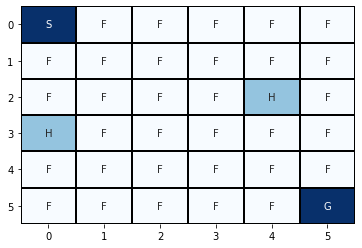

In [300]:
sns.heatmap(np.array(color_intensity).reshape(grid_size,grid_size), annot=np.array(layer_ja).reshape(grid_size,grid_size), cmap="Blues", fmt = '', cbar=False, linewidth=1, linecolor='black')
plt.yticks(rotation=0);

In [3]:
def value_iteration(env, no_of_iterations = 100000, gamma = 1.0):
    value_table = np.zeros(env.observation_space.n)
    threshold = 1e-20
    utility_iterations = []
    final_iterations = 0
    time_taken_lists = []
    error_lists = []
    overall_start_time = time.time()
    for i in range(no_of_iterations):
        start_time = time.time()
        updated_value_table = np.copy(value_table)
        utility = np.sum(updated_value_table)
        utility_iterations.append(utility)
        for state in range(env.observation_space.n):
            Q_value = []
            for action in range(env.action_space.n):
                next_states_rewards = []
                for next_sr in env.P[state][action]: 
                    trans_prob, next_state, reward_prob, _ = next_sr 
                    next_states_rewards.append((trans_prob * (reward_prob + gamma * updated_value_table[next_state]))) 
                Q_value.append(np.sum(next_states_rewards))
            value_table[state] = max(Q_value)
        error = np.sum(np.fabs(updated_value_table - value_table))
        error_lists.append(error)
        stop_time = time.time()
        time_taken = stop_time - start_time
        time_taken_lists.append(time_taken)
        if (error <= threshold):
             print('Value-iteration converged at iteration# %d.' %(i+1))
             final_iterations = i+1
             break
    overall_stop_time = time.time()
    overall_time_taken = overall_stop_time - overall_start_time
    return value_table, utility_iterations, final_iterations, overall_time_taken, error_lists, time_taken_lists

def extract_policy(value_table, gamma = 1.0):
    policy = np.zeros(env.observation_space.n) 
    for state in range(env.observation_space.n):
        Q_table = np.zeros(env.action_space.n)
        for action in range(env.action_space.n):
            for next_sr in env.P[state][action]: 
                trans_prob, next_state, reward_prob, _ = next_sr 
                Q_table[action] += (trans_prob * (reward_prob + gamma * value_table[next_state]))
        policy[state] = np.argmax(Q_table)
    return policy

import seaborn as sns
def plot_policy_v2(rewards, policy, grid, grid_size, title=""):
    sns.color_palette("Set2")
    to_plot_policy = []
    len_grid = "".join(grid)
    for i in range(len(len_grid)):
        if len_grid[i] in ['S', 'G', 'H']:
            if len_grid[i] == 'S':
                to_plot_policy.append(f"S{symbol_mapping[policy[i]]}")
            else:
                to_plot_policy.append(len_grid[i])
        else :
            to_plot_policy.append(symbol_mapping[policy[i]])
        
    sns.heatmap(rewards.reshape(grid_size,grid_size), annot=np.array(to_plot_policy).reshape(grid_size,grid_size), cmap="Blues", fmt = '')
    plt.title(f'Optimal Policy: {title}');

In [4]:
# grid = generate_random_map(size=6)
# env = gym.make('FrozenLake-v0', desc=grid, is_slippery=True)
value_table, utility_iteration, final_iterations, time_taken, error_lists, time_taken_lists = value_iteration(env, gamma=0.9)

Value-iteration converged at iteration# 233.


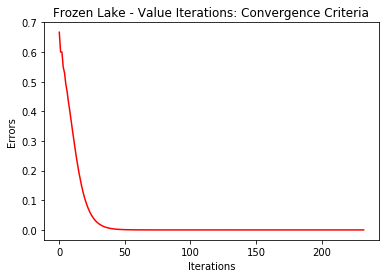

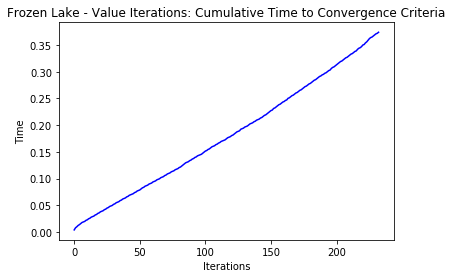

In [5]:
import matplotlib.pyplot as plt
algo = 'Frozen Lake - Value Iterations:'
fig, ax = plt.subplots()
ax.plot(range(final_iterations), error_lists, "r-")
ax.set_xlabel('Iterations')
ax.set_ylabel('Errors')
ax.set_title(f'{algo} Convergence Criteria')
# ax.legend()
plt.show(fig)

import matplotlib.pyplot as plt
algo = 'Frozen Lake - Value Iterations:'
fig, ax = plt.subplots()
ax.plot(range(final_iterations), np.cumsum(time_taken_lists), "b-")
ax.set_xlabel('Iterations')
ax.set_ylabel('Time')
ax.set_title(f'{algo} Cumulative Time to Convergence Criteria')
# ax.legend()
plt.show(fig)

### Value Iterations

In [271]:
gamma = 1 
to_loop = np.arange(0.1, 1 , 0.1)
# 4x4 !! 
# grid = generate_random_map(size=6)
# env = gym.make('FrozenLake-v0', desc=grid, is_slippery=True)
vi_util_opt_pol = []
vi_num_iterations = []
vi_time_taken_list = []
vi_error_list = []
vi_time_taken_lists_new = []
for i in to_loop:
    print("Discount Factor(gamma):", i)
    value_table, _, converged_iteration, time_taken, error, time_taken_lists = value_iteration(env=env, gamma=i)
    vi_util_opt_pol.append(value_table)
    vi_num_iterations.append(converged_iteration)
    vi_time_taken_list.append(time_taken)
    vi_error_list.append(error)
    vi_time_taken_lists_new.append(time_taken_lists)
    print("Utility of optimal policy:" ,np.sum(value_table), "Time Taken:", time_taken, 'Seconds')

Discount Factor(gamma): 0.1
Value-iteration converged at iteration# 21.
Utility of optimal policy: 0.7415837739981271 Time Taken: 0.03591632843017578 Seconds
Discount Factor(gamma): 0.2
Value-iteration converged at iteration# 29.
Utility of optimal policy: 0.8372814032520284 Time Taken: 0.04387688636779785 Seconds
Discount Factor(gamma): 0.30000000000000004
Value-iteration converged at iteration# 38.
Utility of optimal policy: 0.9631430206424311 Time Taken: 0.05486321449279785 Seconds
Discount Factor(gamma): 0.4
Value-iteration converged at iteration# 49.
Utility of optimal policy: 1.1352992608724277 Time Taken: 0.07280135154724121 Seconds
Discount Factor(gamma): 0.5
Value-iteration converged at iteration# 63.
Utility of optimal policy: 1.3838030755336328 Time Taken: 0.08976054191589355 Seconds
Discount Factor(gamma): 0.6
Value-iteration converged at iteration# 80.
Utility of optimal policy: 1.7710041349662133 Time Taken: 0.11074113845825195 Seconds
Discount Factor(gamma): 0.7000000000

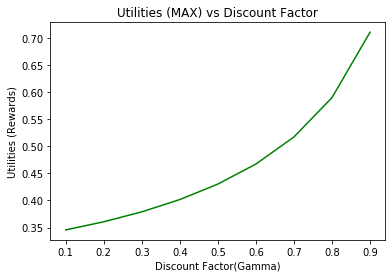

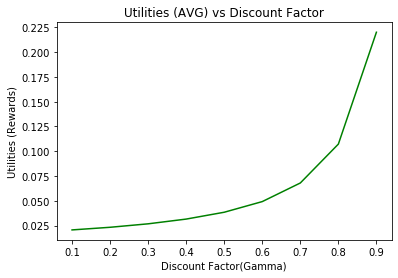

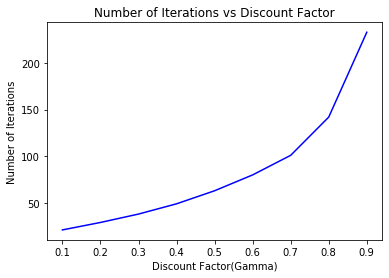

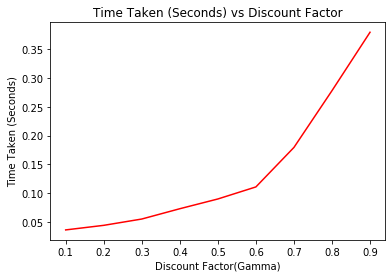

In [272]:
fig, ax = plt.subplots()
ax.plot(list(to_loop) , [np.max(i) for i in vi_util_opt_pol], "g-")
ax.set_xlabel('Discount Factor(Gamma)')
ax.set_ylabel('Utilities (Rewards)')
ax.set_title('Utilities (MAX) vs Discount Factor')
# ax.legend()
plt.show(fig)

fig, ax = plt.subplots()
ax.plot(list(to_loop) , [np.mean(i) for i in vi_util_opt_pol], "g-")
ax.set_xlabel('Discount Factor(Gamma)')
ax.set_ylabel('Utilities (Rewards)')
ax.set_title('Utilities (AVG) vs Discount Factor')
# ax.legend()
plt.show(fig)

fig, ax = plt.subplots()
ax.plot(list(to_loop) , vi_num_iterations, "b-")
ax.set_xlabel('Discount Factor(Gamma)')
ax.set_ylabel('Number of Iterations')
ax.set_title('Number of Iterations vs Discount Factor')
# ax.legend()
plt.show(fig)

fig, ax = plt.subplots()
ax.plot(list(to_loop) , vi_time_taken_list, "r-")
ax.set_xlabel('Discount Factor(Gamma)')
ax.set_ylabel('Time Taken (Seconds)')
ax.set_title('Time Taken (Seconds) vs Discount Factor')
# ax.legend()
plt.show(fig)

In [304]:
gamma = 0.99
# to_loop = np.arange(0.1, 1 , 0.1)
# 4x4 !! 
# grid = generate_random_map(size=6)
size_loop = [6, 12 , 18 , 24 ,30]
# env = gym.make('FrozenLake-v0', desc=grid, is_slippery=True)
visize_util_opt_pol = []
visize_num_iterations = []
visize_time_taken_list = []
visize_error_list = []
visize_time_taken_lists_new = []
for i in size_loop:
    print("size", i)
    n_grid = generate_random_map(size=i)
    n_env = gym.make('FrozenLake-v0', desc=n_grid, is_slippery=True)
    value_table, _, converged_iteration, time_taken, error, time_taken_lists = value_iteration(env=n_env, gamma=gamma)
    visize_util_opt_pol.append(value_table)
    visize_num_iterations.append(converged_iteration)
    visize_time_taken_list.append(time_taken)
    visize_error_list.append(error)
    visize_time_taken_lists_new.append(time_taken_lists)
    print("Utility of optimal policy:" ,np.sum(value_table), "Time Taken:", time_taken, 'Seconds')

size 6
Value-iteration converged at iteration# 832.
Utility of optimal policy: 22.74445090702055 Time Taken: 1.262157678604126 Seconds
size 12
Value-iteration converged at iteration# 1587.
Utility of optimal policy: 18.836538796269473 Time Taken: 9.415871620178223 Seconds
size 18
Value-iteration converged at iteration# 1927.
Utility of optimal policy: 25.993559857643714 Time Taken: 29.498782873153687 Seconds
size 24
Value-iteration converged at iteration# 1908.
Utility of optimal policy: 11.871373089916895 Time Taken: 51.023488998413086 Seconds
size 30
Value-iteration converged at iteration# 1959.
Utility of optimal policy: 48.0820249712161 Time Taken: 81.73098683357239 Seconds


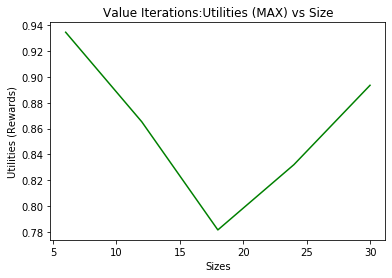

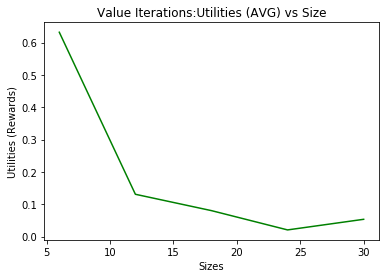

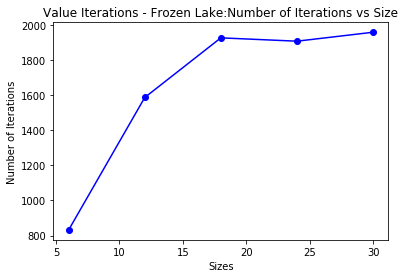

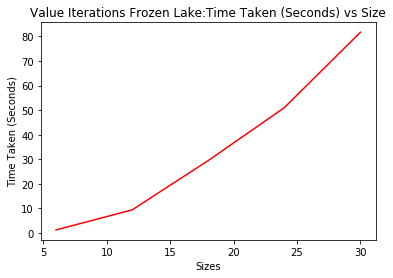

In [321]:
fig, ax = plt.subplots()
ax.plot(list(size_loop) , [np.max(i) for i in visize_util_opt_pol], "g-")
ax.set_xlabel('Sizes')
ax.set_ylabel('Utilities (Rewards)')
ax.set_title('Value Iterations:Utilities (MAX) vs Size')
# ax.legend()
plt.show(fig)

fig, ax = plt.subplots()
ax.plot(list(size_loop) , [np.mean(i) for i in visize_util_opt_pol], "g-")
ax.set_xlabel('Sizes')
ax.set_ylabel('Utilities (Rewards)')
ax.set_title('Value Iterations:Utilities (AVG) vs Size')
# ax.legend()
plt.show(fig)

fig, ax = plt.subplots()
ax.plot(list(size_loop) , visize_num_iterations, "b-o")
ax.set_xlabel('Sizes')
ax.set_ylabel('Number of Iterations')
ax.set_title('Value Iterations - Frozen Lake:Number of Iterations vs Size')
# ax.legend()
plt.show(fig)

fig, ax = plt.subplots()
ax.plot(list(size_loop) , visize_time_taken_list, "r-")
ax.set_xlabel('Sizes')
ax.set_ylabel('Time Taken (Seconds)')
ax.set_title('Value Iterations Frozen Lake:Time Taken (Seconds) vs Size')
# ax.legend()
plt.show(fig)

## Policy Iterations

In [308]:
def compute_value_function(env, policy, gamma=1.0):
    value_table = np.zeros(env.nS)
    threshold = 1e-10
    while True:
        updated_value_table = np.copy(value_table)
        for state in range(env.nS):
            action = policy[state]
            value_table[state] = sum([trans_prob * (reward_prob + gamma * updated_value_table[next_state]) 
                        for trans_prob, next_state, reward_prob, _ in env.P[state][action]])
        if (np.sum((np.fabs(updated_value_table - value_table))) <= threshold):
            break
    return value_table


def extract_policy_pi(env, value_table, gamma = 1.0):
    policy = np.zeros(env.observation_space.n) 
    for state in range(env.observation_space.n):
        Q_table = np.zeros(env.action_space.n)
        for action in range(env.action_space.n):
            for next_sr in env.P[state][action]: 
                trans_prob, next_state, reward_prob, _ = next_sr 
                Q_table[action] += (trans_prob * (reward_prob + gamma * value_table[next_state]))
        policy[state] = np.argmax(Q_table)
    
    return policy

def policy_iteration(env, no_of_iterations = 200000, gamma = 1.0):
    random_policy = np.zeros(env.observation_space.n) 
    converge_iterations = 0 
    utility_iterations = []
    start_time = time.time()
    error_list = []
    time_taken_lists = []
#     final_value_table = 
    for i in range(no_of_iterations):
        new_start_time = time.time()
        new_value_function = compute_value_function(env, random_policy, gamma)
        utility = np.sum(new_value_function)
        utility_iterations.append(new_value_function)
        new_policy = extract_policy_pi(env, new_value_function, gamma)
        errors = np.sum((np.fabs(new_policy - random_policy)))
        error_list.append(errors)
        new_end_time = time.time()
        time_taken_lists.append(new_end_time - new_start_time)
        if (np.all(random_policy == new_policy)):
            print ('Policy-Iteration converged at step %d.' %(i+1))
            converge_iterations = i
            break
        random_policy = new_policy
    stop_time = time.time()
    time_taken = stop_time - start_time
    return new_policy, utility_iterations, converge_iterations, time_taken, error_list, new_value_function, time_taken_lists

In [309]:
size_loop = [6, 12 , 18 , 24 ,30]

# 4x4 !! 
# grid = generate_random_map(size=6)
# env = gym.make('FrozenLake-v0', desc=grid, is_slippery=True)

size_pi_util_opt_pol = []
size_pi_rewards_table = []
size_pi_num_iterations = []
size_pi_time_taken_list = []
size_pi_error_list = []
size_pi_policy = []
size_pi_time_taken_lists = []
for i in size_loop:
    print("Size:", i)
    n_grid = generate_random_map(size=i)
    n_env = gym.make('FrozenLake-v0', desc=n_grid, is_slippery=True)
    policy, _, converged_iteration, time_taken, error_list, value_table, time_taken_lists = policy_iteration(env=n_env, gamma=gamma)
    size_pi_rewards_table.append(value_table)
    size_pi_policy.append(policy)
    size_pi_num_iterations.append(converged_iteration)
    size_pi_time_taken_list.append(time_taken)
    size_pi_error_list.append(error_list)
    size_pi_time_taken_lists.append(time_taken_lists)
    print("Utility of optimal policy:" ,np.sum(value_table), "Time Taken:", time_taken, 'Seconds')

Size: 6
Policy-Iteration converged at step 9.
Utility of optimal policy: 15.702971100230164 Time Taken: 0.905092716217041 Seconds
Size: 12
Policy-Iteration converged at step 15.
Utility of optimal policy: 37.467157552165716 Time Taken: 3.8444442749023438 Seconds
Size: 18
Policy-Iteration converged at step 21.
Utility of optimal policy: 31.049091713447847 Time Taken: 28.070064783096313 Seconds
Size: 24
Policy-Iteration converged at step 29.
Utility of optimal policy: 56.93431928239378 Time Taken: 60.41692614555359 Seconds
Size: 30
Policy-Iteration converged at step 34.
Utility of optimal policy: 14.182573319413098 Time Taken: 148.42140078544617 Seconds


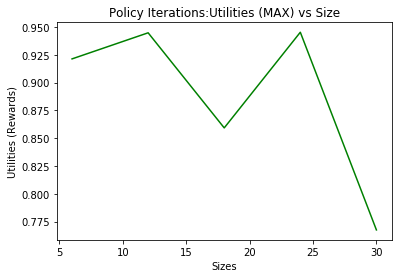

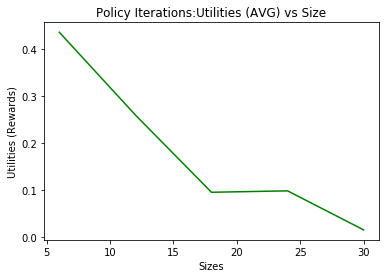

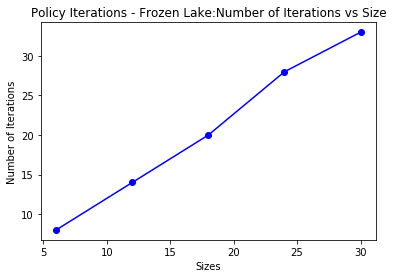

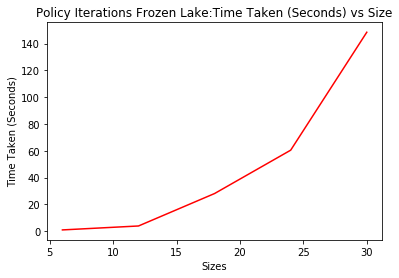

In [312]:
fig, ax = plt.subplots()
ax.plot(list(size_loop) , [np.max(i) for i in size_pi_rewards_table], "g-")
ax.set_xlabel('Sizes')
ax.set_ylabel('Utilities (Rewards)')
ax.set_title('Policy Iterations:Utilities (MAX) vs Size')
# ax.legend()
plt.show(fig)

fig, ax = plt.subplots()
ax.plot(list(size_loop) , [np.mean(i) for i in size_pi_rewards_table], "g-")
ax.set_xlabel('Sizes')
ax.set_ylabel('Utilities (Rewards)')
ax.set_title('Policy Iterations:Utilities (AVG) vs Size')
# ax.legend()
plt.show(fig)

fig, ax = plt.subplots()
ax.plot(list(size_loop) , size_pi_num_iterations, "b-o")
ax.set_xlabel('Sizes')
ax.set_ylabel('Number of Iterations')
ax.set_title('Policy Iterations - Frozen Lake:Number of Iterations vs Size')
# ax.legend()
plt.show(fig)

fig, ax = plt.subplots()
ax.plot(list(size_loop) , size_pi_time_taken_list, "r-")
ax.set_xlabel('Sizes')
ax.set_ylabel('Time Taken (Seconds)')
ax.set_title('Policy Iterations Frozen Lake:Time Taken (Seconds) vs Size')
# ax.legend()
plt.show(fig)

In [23]:
gamma = 0.9
policy, _, converged_iteration, time_taken, error_lists, value_table, time_taken_lists = policy_iteration(env=env, gamma=0.9)

Policy-Iteration converged at step 9.


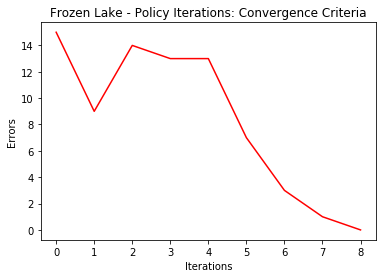

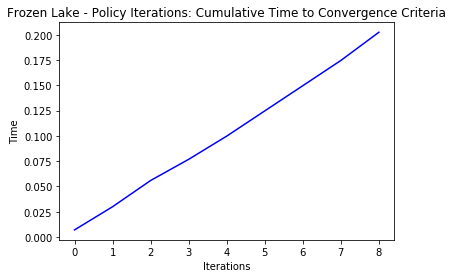

In [25]:

algo = 'Frozen Lake - Policy Iterations:'
fig, ax = plt.subplots()
ax.plot(range(converged_iteration+1), error_lists, "r-")
ax.set_xlabel('Iterations')
ax.set_ylabel('Errors')
ax.set_title(f'{algo} Convergence Criteria')
# ax.legend()
plt.show(fig)

fig, ax = plt.subplots()
ax.plot(range(converged_iteration+1), np.cumsum(time_taken_lists), "b-")
ax.set_xlabel('Iterations')
ax.set_ylabel('Time')
ax.set_title(f'{algo} Cumulative Time to Convergence Criteria')
# ax.legend()
plt.show(fig)

In [269]:
to_loop = np.arange(0.1, 1, 0.1)

# 4x4 !! 
# grid = generate_random_map(size=6)
# env = gym.make('FrozenLake-v0', desc=grid, is_slippery=True)

pi_util_opt_pol = []
pi_rewards_table = []
pi_num_iterations = []
pi_time_taken_list = []
pi_error_list = []
pi_policy = []
pi_time_taken_lists = []
for i in to_loop:
    print("Discount Factor(gamma):", i)
    policy, _, converged_iteration, time_taken, error_list, value_table, time_taken_lists = policy_iteration(env=env, gamma=i)
    pi_rewards_table.append(value_table)
    pi_policy.append(policy)
    pi_num_iterations.append(converged_iteration)
    pi_time_taken_list.append(time_taken)
    pi_error_list.append(error_list)
    pi_time_taken_lists.append(time_taken_lists)
    print("Utility of optimal policy:" ,np.sum(value_table), "Time Taken:", time_taken, 'Seconds')

Discount Factor(gamma): 0.1
Policy-Iteration converged at step 8.
Utility of optimal policy: 0.7415837739873827 Time Taken: 0.01994609832763672 Seconds
Discount Factor(gamma): 0.2
Policy-Iteration converged at step 7.
Utility of optimal policy: 0.837281403244686 Time Taken: 0.02393627166748047 Seconds
Discount Factor(gamma): 0.30000000000000004
Policy-Iteration converged at step 7.
Utility of optimal policy: 0.9631430206037734 Time Taken: 0.030951976776123047 Seconds
Discount Factor(gamma): 0.4
Policy-Iteration converged at step 7.
Utility of optimal policy: 1.135299260828449 Time Taken: 0.028924226760864258 Seconds
Discount Factor(gamma): 0.5
Policy-Iteration converged at step 8.
Utility of optimal policy: 1.3838030754890882 Time Taken: 0.09670519828796387 Seconds
Discount Factor(gamma): 0.6
Policy-Iteration converged at step 7.
Utility of optimal policy: 1.771004134875421 Time Taken: 0.04886913299560547 Seconds
Discount Factor(gamma): 0.7000000000000001
Policy-Iteration converged at 

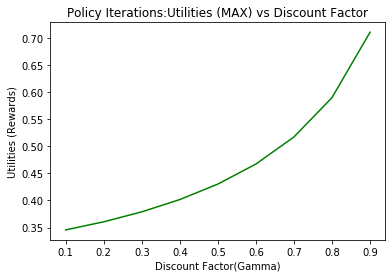

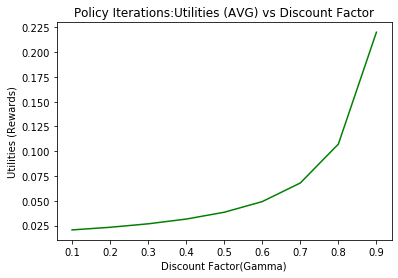

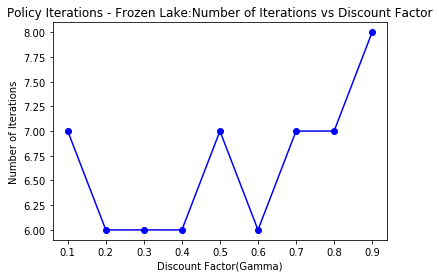

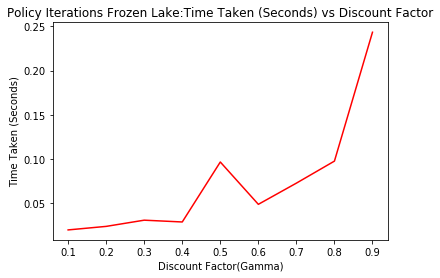

In [275]:
fig, ax = plt.subplots()
ax.plot(list(to_loop) , [np.max(i) for i in pi_rewards_table], "g-")
ax.set_xlabel('Discount Factor(Gamma)')
ax.set_ylabel('Utilities (Rewards)')
ax.set_title('Policy Iterations:Utilities (MAX) vs Discount Factor')
# ax.legend()
plt.show(fig)

fig, ax = plt.subplots()
ax.plot(list(to_loop) , [np.mean(i) for i in pi_rewards_table], "g-")
ax.set_xlabel('Discount Factor(Gamma)')
ax.set_ylabel('Utilities (Rewards)')
ax.set_title('Policy Iterations:Utilities (AVG) vs Discount Factor')
# ax.legend()
plt.show(fig)

fig, ax = plt.subplots()
ax.plot(list(to_loop) , pi_num_iterations, "b-o")
ax.set_xlabel('Discount Factor(Gamma)')
ax.set_ylabel('Number of Iterations')
ax.set_title('Policy Iterations - Frozen Lake:Number of Iterations vs Discount Factor')
# ax.legend()
plt.show(fig)

fig, ax = plt.subplots()
ax.plot(list(to_loop) , pi_time_taken_list, "r-")
ax.set_xlabel('Discount Factor(Gamma)')
ax.set_ylabel('Time Taken (Seconds)')
ax.set_title('Policy Iterations Frozen Lake:Time Taken (Seconds) vs Discount Factor')
# ax.legend()
plt.show(fig)

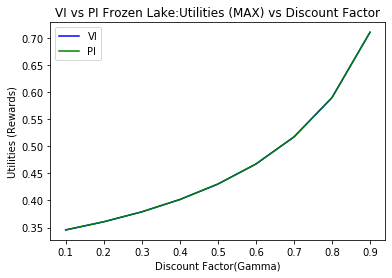

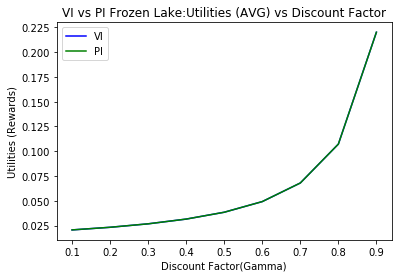

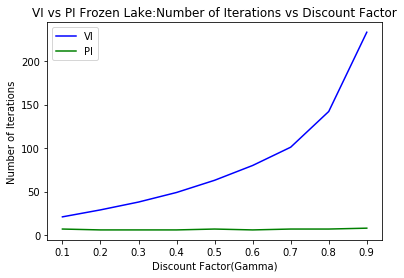

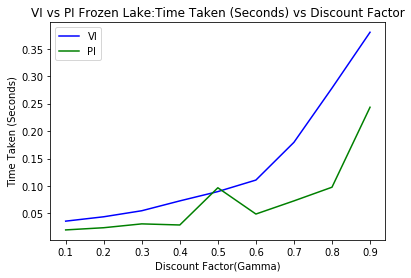

In [273]:
fig, ax = plt.subplots()
ax.plot(list(to_loop) , [np.max(i) for i in vi_util_opt_pol], "b-", label='VI')
ax.plot(list(to_loop) , [np.max(i) for i in pi_rewards_table], "g-", label='PI')
ax.set_xlabel('Discount Factor(Gamma)')
ax.set_ylabel('Utilities (Rewards)')
ax.set_title('VI vs PI Frozen Lake:Utilities (MAX) vs Discount Factor')
ax.legend()
plt.show(fig)

fig, ax = plt.subplots()
ax.plot(list(to_loop) , [np.mean(i) for i in vi_util_opt_pol], "b-", label='VI')
ax.plot(list(to_loop) , [np.mean(i) for i in pi_rewards_table], "g-", label='PI')
ax.set_xlabel('Discount Factor(Gamma)')
ax.set_ylabel('Utilities (Rewards)')
ax.set_title('VI vs PI Frozen Lake:Utilities (AVG) vs Discount Factor')
ax.legend()
plt.show(fig)

fig, ax = plt.subplots()
ax.plot(list(to_loop) , vi_num_iterations, "b-", label='VI')
ax.plot(list(to_loop) , pi_num_iterations, "g-", label='PI')
ax.set_xlabel('Discount Factor(Gamma)')
ax.set_ylabel('Number of Iterations')
ax.set_title('VI vs PI Frozen Lake:Number of Iterations vs Discount Factor')
ax.legend()
plt.show(fig)

fig, ax = plt.subplots()
ax.plot(list(to_loop) , vi_time_taken_list, "b-", label='VI')
ax.plot(list(to_loop) , pi_time_taken_list, "g-", label='PI')
ax.set_xlabel('Discount Factor(Gamma)')
ax.set_ylabel('Time Taken (Seconds)')
ax.set_title('VI vs PI Frozen Lake:Time Taken (Seconds) vs Discount Factor')
ax.legend()
plt.show(fig)

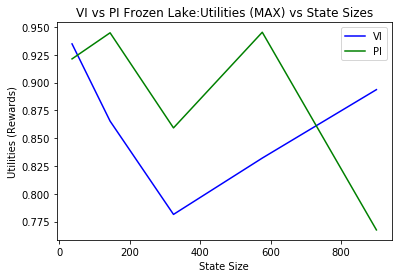

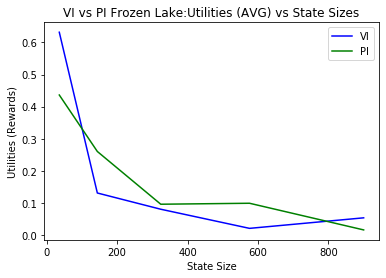

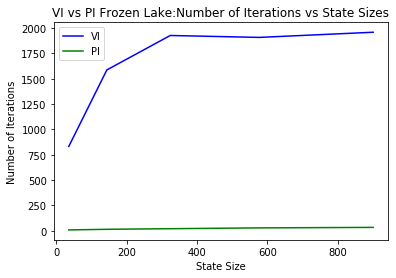

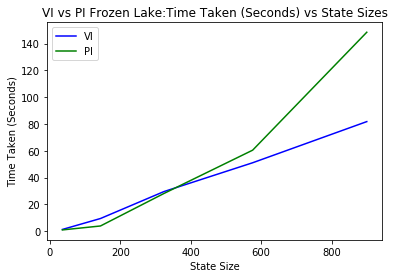

In [318]:
fig, ax = plt.subplots()
ax.plot([x*x for x in list(size_loop)] , [np.max(i) for i in visize_util_opt_pol], "b-", label='VI')
ax.plot([x*x for x in list(size_loop)], [np.max(i) for i in size_pi_rewards_table], "g-", label='PI')
ax.set_xlabel('State Size')
ax.set_ylabel('Utilities (Rewards)')
ax.set_title('VI vs PI Frozen Lake:Utilities (MAX) vs State Sizes')
ax.legend()
plt.show(fig)

fig, ax = plt.subplots()
ax.plot([x*x for x in list(size_loop)] , [np.mean(i) for i in visize_util_opt_pol], "b-", label='VI')
ax.plot([x*x for x in list(size_loop)] , [np.mean(i) for i in size_pi_rewards_table], "g-", label='PI')
ax.set_xlabel('State Size')
ax.set_ylabel('Utilities (Rewards)')
ax.set_title('VI vs PI Frozen Lake:Utilities (AVG) vs State Sizes')
ax.legend()
plt.show(fig)

fig, ax = plt.subplots()
ax.plot([x*x for x in list(size_loop)] , visize_num_iterations, "b-", label='VI')
ax.plot([x*x for x in list(size_loop)] , size_pi_num_iterations, "g-", label='PI')
ax.set_xlabel('State Size')
ax.set_ylabel('Number of Iterations')
ax.set_title('VI vs PI Frozen Lake:Number of Iterations vs State Sizes')
ax.legend()
plt.show(fig)

fig, ax = plt.subplots()
ax.plot([x*x for x in list(size_loop)], visize_time_taken_list, "b-", label='VI')
ax.plot([x*x for x in list(size_loop)], size_pi_time_taken_list, "g-", label='PI')
ax.set_xlabel('State Size')
ax.set_ylabel('Time Taken (Seconds)')
ax.set_title('VI vs PI Frozen Lake:Time Taken (Seconds) vs State Sizes')
ax.legend()
plt.show(fig)

## Q Learning

In [244]:
# Initialized

symbol_mapping = {0:'←', 1:'↓', 2:'→', 3:'↑'}
def run_qlearning(env, total_episodes, num_iterations, num_state, alpha, gamma, epsilon, epsilon_decay=False):
    print("run with: epsilon", epsilon, "Gamma:", gamma, "Alpha:", alpha, "Decay", epsilon_decay)
    q = {}
    for s in range(env.observation_space.n):
      for a in range(env.action_space.n):
         q[(s,a)] = 0

    def update_q_table(prev_state, action, reward, nextstate, alpha, gamma):
         qa = max([q[(nextstate, a)] for a in range(env.action_space.n)])
         q[(prev_state,action)] += alpha * (reward + gamma * qa - q[(prev_state,action)])

    def epsilon_greedy_policy(state, epsilon):
         if random.uniform(0,1) < epsilon:
    #          print("Explore")
             return env.action_space.sample()
         else:
    #          print("Exploit")
             return max(list(range(env.action_space.n)), key = lambda x: q[(state,x)])

    def get_optimal_policy(q_table, num_state):
        optimal_policy = np.zeros(num_state, dtype=int)
        reward_sequences = np.zeros(num_state, dtype=float)
        for s in range(num_state):
            optimal_policy[s] = np.argmax([q[(s, a)] for a in range(env.action_space.n)])
            reward_sequences[s] = q[(s, optimal_policy[s])]

        optimal_sign = []
        for s in range(num_state):
            if s == 0:
                optimal_sign.append(f"S{symbol_mapping[optimal_policy[s]]}")
            elif s == (grid_size*grid_size-1):
                optimal_sign.append('G')
            elif reward_sequences[s] == 0:
                optimal_sign.append('H')
            else:
                optimal_sign.append(symbol_mapping[optimal_policy[s]])
    #     optimal_sign = [symbol_mapping[i] for i in optimal_policy]
        return optimal_policy, reward_sequences, optimal_sign
    
    total_rewards = []
    iterations_list = []
    start_time = time.time()
    for i in range(total_episodes):
        r = 0
        prev_state = env.reset()
        if i % 100000 == 0:
            print(f"Average Rewards After {i} Episodes", np.mean(total_rewards))
#             Step to take!!
        for j in range(num_iterations):
    #         env.render()
            # In each state, we select the action by epsilon-greedy policy
            action = epsilon_greedy_policy(prev_state, epsilon)

            # then we perform the action and move to the next state, and 
            # receive the reward
            nextstate, reward, done, _ = env.step(action)

            # Next we update the Q value using our update_q_table function
            # which updates the Q value by Q learning update rule

            update_q_table(prev_state, action, reward, nextstate, alpha, gamma)

            # Finally we update the previous state as next state
            prev_state = nextstate

            # Store all the rewards obtained
            r += reward

            #we will break the loop, if we are at the terminal 
            #state of the episode
            if done:
                break

        if epsilon_decay:
            epsilon = min_epsilon + (max_epsilon - min_epsilon)*np.exp(-decay_rate*i)
        total_rewards.append(r)
        iterations_list.append(j)
    #         print("total reward: ", r, epsilon)
    env.close()
    stop_time = time.time()
    time_taken = stop_time - start_time
    ql_optimal_policy, q_rewards, ql_policy_sign = get_optimal_policy(q, num_state)
    return ql_optimal_policy, q_rewards, ql_policy_sign, time_taken, iterations_list

### Different epsilon!! - No Decay

In [245]:
alpha = 0.9
gamma = 0.9
total_episodes = 50000
num_iterations = 8000000
max_epsilon = 1.0             # Exploration probability at start
min_epsilon = 0.01            # Minimum exploration probability
decay_rate = 0.0001           # Exponential decay rate for exploration prob
epsilon_decay = False

In [93]:
epsilon_range = np.arange(0.1, 1, 0.1)
epsilon_decay = False
# grid_size = 6
# num_state = grid_size*grid_size
# grid = generate_random_map(size=grid_size)
# env = gym.make('FrozenLake-v0', desc=grid, is_slippery=True)
# env.seed(1)
list_optimal = []
list_qrewards = []
list_pol_sign = []
list_time_taken = []
list_iterations = []
for i in epsilon_range:
    print("Epsilon", i)
    ql_optimal_policy, q_rewards, ql_policy_sign, time_taken, iteration = run_qlearning(env, total_episodes, num_iterations, num_state, alpha, gamma, i, epsilon_decay=epsilon_decay)
    list_optimal.append(ql_optimal_policy)
    list_qrewards.append(q_rewards)
    list_pol_sign.append(ql_policy_sign)
    list_time_taken.append(time_taken)
    list_iterations.append(iteration)

Epsilon 0.1
run with: epsilon 0.1 Gamma: 0.9 Alpha: 0.9 Decay False
Average Rewards After 0 Episodes nan
Epsilon 0.2
run with: epsilon 0.2 Gamma: 0.9 Alpha: 0.9 Decay False
Average Rewards After 0 Episodes nan
Epsilon 0.30000000000000004
run with: epsilon 0.30000000000000004 Gamma: 0.9 Alpha: 0.9 Decay False
Average Rewards After 0 Episodes nan
Epsilon 0.4
run with: epsilon 0.4 Gamma: 0.9 Alpha: 0.9 Decay False
Average Rewards After 0 Episodes nan
Epsilon 0.5
run with: epsilon 0.5 Gamma: 0.9 Alpha: 0.9 Decay False
Average Rewards After 0 Episodes nan
Epsilon 0.6
run with: epsilon 0.6 Gamma: 0.9 Alpha: 0.9 Decay False
Average Rewards After 0 Episodes nan
Epsilon 0.7000000000000001
run with: epsilon 0.7000000000000001 Gamma: 0.9 Alpha: 0.9 Decay False
Average Rewards After 0 Episodes nan
Epsilon 0.8
run with: epsilon 0.8 Gamma: 0.9 Alpha: 0.9 Decay False
Average Rewards After 0 Episodes nan
Epsilon 0.9
run with: epsilon 0.9 Gamma: 0.9 Alpha: 0.9 Decay False
Average Rewards After 0 Episod

### Different Epsilon - Decay

In [246]:
epsilon_range = np.arange(0.1, 1, 0.1)
epsilon_decay = True
decay_rate = 0.0001
max_epsilon = 1.0             # Exploration probability at start
min_epsilon = 0.01            # Minimum exploration probability
# decay_rate = 0.0001  change the decay rate!! 
# decay_range = [0.005, 0.001, 0.0001]
ep_decay_list_optimal = []
ep_decay_list_qrewards = []
ep_decay_list_pol_sign = []
ep_decay_list_time_taken = []
ep_decay_iterations = []
# total_episodes = 100
# num_iterations = 100
for i in epsilon_range:
    ql_optimal_policy, q_rewards, ql_policy_sign, time_taken, iterations = run_qlearning(env, total_episodes, num_iterations, num_state, alpha, gamma, i, epsilon_decay=epsilon_decay)
    ep_decay_list_optimal.append(ql_optimal_policy)
    ep_decay_list_qrewards.append(q_rewards)
    ep_decay_list_pol_sign.append(ql_policy_sign)
    ep_decay_list_time_taken.append(time_taken)
    ep_decay_iterations.append(iterations)

run with: epsilon 0.1 Gamma: 0.9 Alpha: 0.9 Decay True
Average Rewards After 0 Episodes nan


C:\Users\Por\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\Por\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


run with: epsilon 0.2 Gamma: 0.9 Alpha: 0.9 Decay True
Average Rewards After 0 Episodes nan
run with: epsilon 0.30000000000000004 Gamma: 0.9 Alpha: 0.9 Decay True
Average Rewards After 0 Episodes nan
run with: epsilon 0.4 Gamma: 0.9 Alpha: 0.9 Decay True
Average Rewards After 0 Episodes nan
run with: epsilon 0.5 Gamma: 0.9 Alpha: 0.9 Decay True
Average Rewards After 0 Episodes nan
run with: epsilon 0.6 Gamma: 0.9 Alpha: 0.9 Decay True
Average Rewards After 0 Episodes nan
run with: epsilon 0.7000000000000001 Gamma: 0.9 Alpha: 0.9 Decay True
Average Rewards After 0 Episodes nan
run with: epsilon 0.8 Gamma: 0.9 Alpha: 0.9 Decay True
Average Rewards After 0 Episodes nan
run with: epsilon 0.9 Gamma: 0.9 Alpha: 0.9 Decay True
Average Rewards After 0 Episodes nan


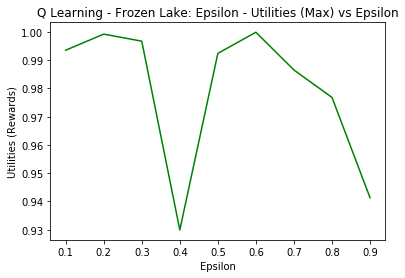

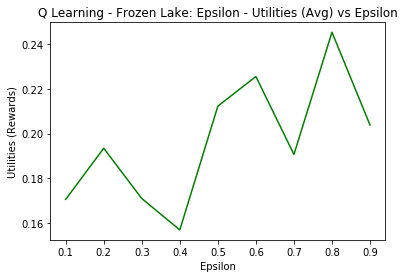

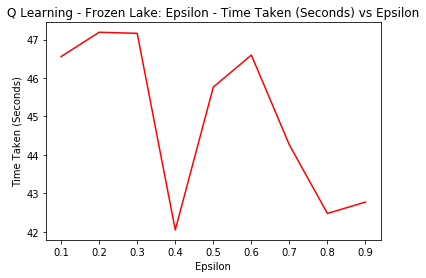

In [266]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot(list(alpha_range) , [np.max(i) for i in ep_decay_list_qrewards], "g-")
# ax.plot(list(epsilon_range) , [np.max(i) for i in ep_decay_list_qrewards], "b-", label='Epsilon Decay')
ax.set_xlabel('Epsilon')
ax.set_ylabel('Utilities (Rewards)')
ax.set_title('Q Learning - Frozen Lake: Epsilon - Utilities (Max) vs Epsilon')
# ax.legend()
plt.show(fig)

fig, ax = plt.subplots()
ax.plot(list(alpha_range) , [np.mean(i) for i in ep_decay_list_qrewards], "g-")
# ax.plot(list(epsilon_range) , [np.mean(i) for i in ep_decay_list_qrewards], "b-", label='Epsilon Decay')
ax.set_xlabel('Epsilon')
ax.set_ylabel('Utilities (Rewards)')
ax.set_title('Q Learning - Frozen Lake: Epsilon - Utilities (Avg) vs Epsilon')
# ax.legend()
plt.show(fig)

fig, ax = plt.subplots()
ax.plot(list(alpha_range) , ep_decay_list_time_taken, "r-", label='No Decay')
# ax.plot(list(epsilon_range) , ep_decay_list_time_taken, "b-", label='Epsilon Decay')
ax.set_xlabel('Epsilon')
ax.set_ylabel('Time Taken (Seconds)')
ax.set_title('Q Learning - Frozen Lake: Epsilon - Time Taken (Seconds) vs Epsilon')
# ax.legend()
plt.show(fig)

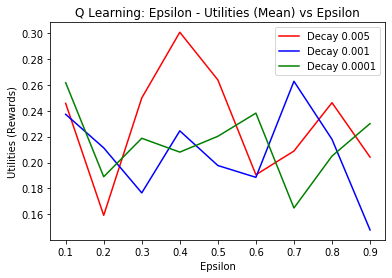

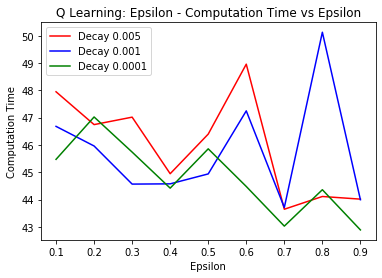

In [232]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
color_to_choose = ['r-', 'b-', 'g-', 'y-']
cnt = 0
for i in ep_decay_list_qrewards.keys():
    ax.plot(list(epsilon_range) , [np.mean(j) for j in ep_decay_list_qrewards[i]], color_to_choose[cnt], label=f'Decay {i}')
    cnt += 1
ax.set_xlabel('Epsilon')
ax.set_ylabel('Utilities (Rewards)')
ax.set_title('Q Learning: Epsilon - Utilities (Mean) vs Epsilon')
ax.legend()
plt.show(fig)


fig, ax = plt.subplots()
color_to_choose = ['r-', 'b-', 'g-', 'y-']
cnt = 0
for i in ep_decay_list_time_taken.keys():
    ax.plot(list(epsilon_range) , ep_decay_list_time_taken[i], color_to_choose[cnt], label=f'Decay {i}')
    cnt += 1
ax.set_xlabel('Epsilon')
ax.set_ylabel('Computation Time')
ax.set_title('Q Learning: Epsilon - Computation Time vs Epsilon')
ax.legend()
plt.show(fig)

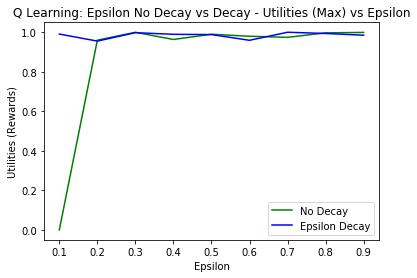

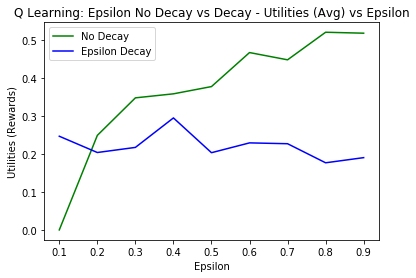

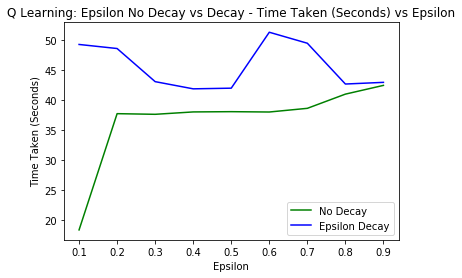

In [73]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot(list(epsilon_range) , [np.max(i) for i in list_qrewards], "g-", label='No Decay')
ax.plot(list(epsilon_range) , [np.max(i) for i in ep_decay_list_qrewards], "b-", label='Epsilon Decay')
ax.set_xlabel('Epsilon')
ax.set_ylabel('Utilities (Rewards)')
ax.set_title('Q Learning: Epsilon No Decay vs Decay - Utilities (Max) vs Epsilon')
ax.legend()
plt.show(fig)

fig, ax = plt.subplots()
ax.plot(list(epsilon_range) , [np.mean(i) for i in list_qrewards], "g-", label='No Decay')
ax.plot(list(epsilon_range) , [np.mean(i) for i in ep_decay_list_qrewards], "b-", label='Epsilon Decay')
ax.set_xlabel('Epsilon')
ax.set_ylabel('Utilities (Rewards)')
ax.set_title('Q Learning: Epsilon No Decay vs Decay - Utilities (Avg) vs Epsilon')
ax.legend()
plt.show(fig)

fig, ax = plt.subplots()
ax.plot(list(epsilon_range) , list_time_taken, "g-", label='No Decay')
ax.plot(list(epsilon_range) , ep_decay_list_time_taken, "b-", label='Epsilon Decay')
ax.set_xlabel('Epsilon')
ax.set_ylabel('Time Taken (Seconds)')
ax.set_title('Q Learning: Epsilon No Decay vs Decay - Time Taken (Seconds) vs Epsilon')
ax.legend()
plt.show(fig)

### Different Alpha

In [250]:
# alpha = 0.9
# gamma = 0.9
alpha_range = np.arange(0.1, 1, 0.1)
epsilon_decay = True
new_epsilon = 0.8
decay_rate = 0.0001  

alpha_list_optimal = []
alpha_list_qrewards = []
alpha_list_pol_sign = []
alpha_list_time_taken = []
alpha_list_iterations = []
for i in alpha_range:
    print("Learning Rates", i)
#     env = gym.make('FrozenLake-v0', desc=grid, is_slippery=False)
    ql_optimal_policy, q_rewards, ql_policy_sign, time_taken, iterations = run_qlearning(env, total_episodes, num_iterations, num_state, i, gamma, new_epsilon, epsilon_decay=epsilon_decay)
#     ql_optimal_policy, q_rewards, ql_policy_sign, time_taken = run_qlearning(env, total_episodes, num_state, i, gamma, epsilon, epsilon_decay=epsilon_decay)
    alpha_list_optimal.append(ql_optimal_policy)
    alpha_list_qrewards.append(q_rewards)
    alpha_list_pol_sign.append(ql_policy_sign)
    alpha_list_time_taken.append(time_taken)
    alpha_list_iterations.append(iterations)

Learning Rates 0.1
run with: epsilon 0.8 Gamma: 0.9 Alpha: 0.1 Decay True
Average Rewards After 0 Episodes nan


C:\Users\Por\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\Por\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Learning Rates 0.2
run with: epsilon 0.8 Gamma: 0.9 Alpha: 0.2 Decay True
Average Rewards After 0 Episodes nan
Learning Rates 0.30000000000000004
run with: epsilon 0.8 Gamma: 0.9 Alpha: 0.30000000000000004 Decay True
Average Rewards After 0 Episodes nan
Learning Rates 0.4
run with: epsilon 0.8 Gamma: 0.9 Alpha: 0.4 Decay True
Average Rewards After 0 Episodes nan
Learning Rates 0.5
run with: epsilon 0.8 Gamma: 0.9 Alpha: 0.5 Decay True
Average Rewards After 0 Episodes nan
Learning Rates 0.6
run with: epsilon 0.8 Gamma: 0.9 Alpha: 0.6 Decay True
Average Rewards After 0 Episodes nan
Learning Rates 0.7000000000000001
run with: epsilon 0.8 Gamma: 0.9 Alpha: 0.7000000000000001 Decay True
Average Rewards After 0 Episodes nan
Learning Rates 0.8
run with: epsilon 0.8 Gamma: 0.9 Alpha: 0.8 Decay True
Average Rewards After 0 Episodes nan
Learning Rates 0.9
run with: epsilon 0.8 Gamma: 0.9 Alpha: 0.9 Decay True
Average Rewards After 0 Episodes nan


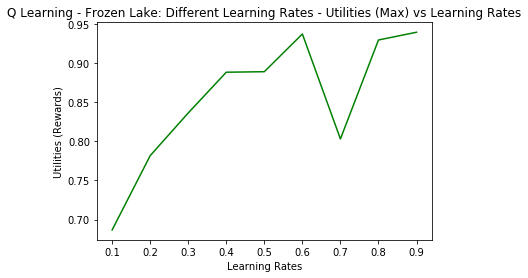

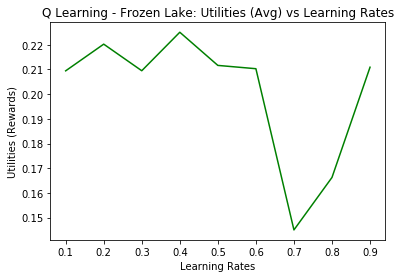

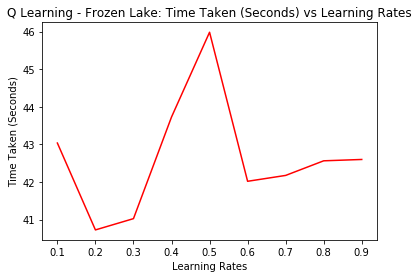

In [280]:
fig, ax = plt.subplots()
ax.plot(list(alpha_range) , [np.max(i) for i in alpha_list_qrewards], "g-")
# ax.plot(list(epsilon_range) , [np.max(i) for i in ep_decay_list_qrewards], "b-", label='Epsilon Decay')
ax.set_xlabel('Learning Rates')
ax.set_ylabel('Utilities (Rewards)')
ax.set_title('Q Learning - Frozen Lake: Different Learning Rates - Utilities (Max) vs Learning Rates')
# ax.legend()
plt.show(fig)

fig, ax = plt.subplots()
ax.plot(list(alpha_range) , [np.mean(i) for i in alpha_list_qrewards], "g-")
# ax.plot(list(epsilon_range) , [np.mean(i) for i in ep_decay_list_qrewards], "b-", label='Epsilon Decay')
ax.set_xlabel('Learning Rates')
ax.set_ylabel('Utilities (Rewards)')
ax.set_title('Q Learning - Frozen Lake: Utilities (Avg) vs Learning Rates')
# ax.legend()
plt.show(fig)

fig, ax = plt.subplots()
ax.plot(list(alpha_range) , alpha_list_time_taken, "r-")
# ax.plot(list(epsilon_range) , ep_decay_list_time_taken, "b-", label='Epsilon Decay')
ax.set_xlabel('Learning Rates')
ax.set_ylabel('Time Taken (Seconds)')
ax.set_title('Q Learning - Frozen Lake: Time Taken (Seconds) vs Learning Rates')
# ax.legend()
plt.show(fig)

## Optimal Policy Discussion

In [202]:
# Evaluate each policy and get scores !! 
def play_agent(env, policy):
     prev_state = env.reset()
     starting_state = 0
     r = 0
     while True:
        nextstate, reward, done, _ = env.step(policy[starting_state])
        starting_state = nextstate
        r += reward
        if done:
           break
     return r


def run_policy(env, policy, n = 1000):
    list_score = []
    for i in range(n):
        scores = play_agent(env, policy)
        list_score.append(scores)
    return np.sum(list_score)/len(list_score)

### QLearning Policy

run with: epsilon 0.8 Gamma: 0.9 Alpha: 0.4 Decay True
Average Rewards After 0 Episodes nan


C:\Users\Por\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\Por\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


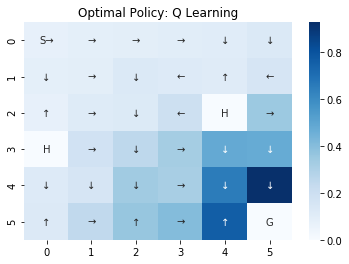

In [252]:
# Final policy!!
alpha = 0.4
epsilon = 0.8
gamma = 0.9
epsilon_decay = True
fin_ql_optimal_policy, fin_q_rewards, fin_ql_policy_sign, time_taken, _ = run_qlearning(env, total_episodes, num_iterations, num_state, alpha, gamma, epsilon, epsilon_decay=epsilon_decay)
plot_policy_v2(fin_q_rewards, fin_ql_optimal_policy, grid=grid,grid_size=6, title="Q Learning")

In [253]:
print("Q Learning - Optimal Policy Pass", run_policy(env, fin_ql_optimal_policy, 10000) * 100, "%", time_taken, 's')

Q Learning - Optimal Policy Pass 94.87 % 37.66809034347534 s


### Policy Iteration - Optimal Policy

Policy-Iteration converged at step 9.
Policy Iterations - Optimal Policy Pass 99.07000000000001 % 0.22439908981323242 s


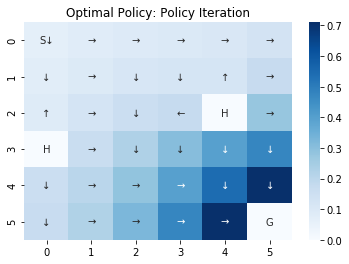

In [208]:
gamma = 0.9
policy, _, converged_iteration, time_taken, error_lists, value_table, time_taken_lists = policy_iteration(env=env, gamma=gamma)
plot_policy_v2(value_table, policy, grid=grid, grid_size=6, title="Policy Iteration")
print("Policy Iterations - Optimal Policy Pass", run_policy(env, policy, 10000) * 100, "%", time_taken, 's')

### Value Iteration - Optimal Policy

Value-iteration converged at iteration# 233.
Value Iterations - Optimal Policy Pass 99.19 % 0.409928560256958 s


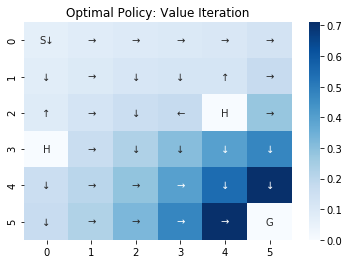

In [207]:
gamma = 0.9
value_table, utility_iteration, final_iterations, time_taken, error_lists, time_taken_lists = value_iteration(env, gamma=gamma)
policy_vi = extract_policy(value_table, gamma)
plot_policy_v2(value_table, policy_vi, grid=grid,grid_size=6 , title="Value Iteration")
print("Value Iterations - Optimal Policy Pass", run_policy(env, policy_vi, 10000) * 100, "%", time_taken, 's')